# Endometrium analysis - prepare data for CellphoneDB

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os
import sys

def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './cellphoneDB/'
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

'/home/jovyan/my-conda-envs/sc_analysis/bin/python'

# Prepare INPUT

## Define microenvironments

In [2]:
microenvironments = {'Prolif_basalis': ['SOX9_basalis', 'eStromal', 'eStromal_MMPs', 'Fibroblast_basalis', 'uSMCs'], 
'Secretory_early': [ 'preGlandular', 'preLuminal',  'dStromal_early', 'uNK3', 'uNK1', 'eM1', 'eM2', 'Arterial', 'Venous'],
'Secretory_mid': ['Glandular', 'Glandular_secretory',  'Luminal', 'dStromal_mid'],
'Secretory_late': [ 'Glandular_secretory', 'Glandular_secretory_FGF7', 'dStromal_late'] }
microenvironments

{'Prolif_basalis': ['SOX9_basalis',
  'eStromal',
  'eStromal_MMPs',
  'Fibroblast_basalis',
  'uSMCs'],
 'Secretory_early': ['preGlandular',
  'preLuminal',
  'dStromal_early',
  'uNK3',
  'uNK1',
  'eM1',
  'eM2',
  'Arterial',
  'Venous'],
 'Secretory_mid': ['Glandular',
  'Glandular_secretory',
  'Luminal',
  'dStromal_mid'],
 'Secretory_late': ['Glandular_secretory',
  'Glandular_secretory_FGF7',
  'dStromal_late']}

In [3]:
celltypes_of_interest = sum(microenvironments.values(), [])
set(celltypes_of_interest)

{'Arterial',
 'Fibroblast_basalis',
 'Glandular',
 'Glandular_secretory',
 'Glandular_secretory_FGF7',
 'Luminal',
 'SOX9_basalis',
 'Venous',
 'dStromal_early',
 'dStromal_late',
 'dStromal_mid',
 'eM1',
 'eM2',
 'eStromal',
 'eStromal_MMPs',
 'preGlandular',
 'preLuminal',
 'uNK1',
 'uNK3',
 'uSMCs'}

## Load raw counts andata

In [4]:
path2data = '/nfs/team292/lg18/endometriosis/integrated_objects/'
adata = sc.read(path2data + 'cells_integrated.h5ad')
adata.X.shape

(390867, 17736)

#### Add celltype annotations: EPITHELIAL, MESENCHYMAL and IMMUNE 

In [5]:
annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium.csv',index_col=0)
annot_all = annot_df['Mareckova_celltype'].to_dict()
annot = dict(annot_all)
adata.obs['Mareckova_celltype'] = adata.obs_names.map(annot)
print(adata.obs['Mareckova_celltype'].value_counts())

annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium_epithelial_CLEAN.csv',index_col=0)
annot_df.at[annot_df['Mareckova_epi_celltype'] == 'Hormones', 'Mareckova_epi_celltype'] = 'eHormones'
annot_df.at[annot_df['Mareckova_epi_celltype'] == 'Hormones_secretory', 'Mareckova_epi_celltype'] = 'eHormones'
annot_df.head()
annot1 = annot_df['Mareckova_epi_celltype'].to_dict()
annot.update(annot1)


annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium_mesenchymal_CLEAN.csv',index_col=0)
annot_df.at[annot_df['Mareckova_mesen_celltype'] == 'Hormones', 'Mareckova_mesen_celltype'] = 'sHormones'
annot_df.head()
annot2 = annot_df['Mareckova_mesen_celltype'].to_dict()
annot.update(annot2)

annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium_endothelial.csv',index_col=0)
annot_df.head()
annot2 = annot_df['Mareckova_endo_celltype'].to_dict()
annot.update(annot2)



annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/cells_endometrium_immune.csv',index_col=0)
annot_df.head()
annot2 = annot_df['immune_subcluster_labels'].to_dict()
annot.update(annot2)


adata.obs['celltype'] = adata.obs_names.map(annot)
print(adata.obs['celltype'].value_counts())

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (5,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,39,40,41,42,46,47,55,56,58,59,60,62,69) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Mesen_dStromal          96529
Mesen_eStromal          79488
Immune_Lymphoid         34456
Epi_SOX9                32015
Epi_Glandular           27887
Endothelial             23519
Epi_preGlandular        16765
Epi_Luminal             14253
Epi_Horm                11490
Mesen_ePV               11325
Immune_Myeloid          11260
LowQC                    7549
Epi_Ciliated             7467
Doublet                  5616
Mesen_mPV                4618
Mesen_uSMCs              2995
Epi_endocervix_MUC5B     1748
Epi_Glands                952
Mesen_FibBasalis          539
Epi_cervix_KRT5           396
Name: Mareckova_celltype, dtype: int64


/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (15,19,21,22,23,24,25,39,40,41,46,47,60,61,63,64,65) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (13,15,17,18,19,21,22,23,24,25,41,42,46,55,58) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


eStromal           55612
dStromal_mid       43790
Mesen_dStromal     22381
dStromal_early     16804
Venous             15494
                   ...  
cDC1                 188
dHormones            172
Plasma_B_Cell         89
Red_Blood_Cell        43
Epi_cervix_KRT5       23
Name: celltype, Length: 74, dtype: int64


#### Remove lowQC, doublets and unwanted cells

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'Mareckova_celltype' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'celltype' as categorical


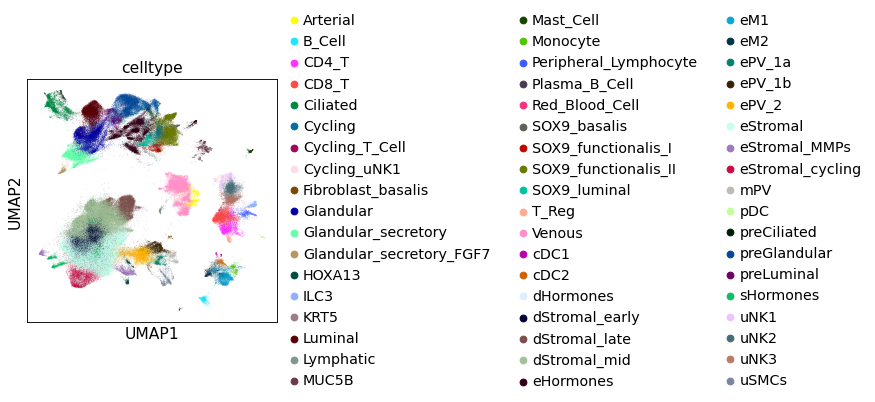

In [6]:
adata = adata[[ i not in ['Doublet', 'LowQC', 'Other'] for i in adata.obs['celltype'] ]]
adata = adata[[ 'Epi_' not in i for i in adata.obs['celltype'] ]]
adata = adata[[ 'Mesen_' not in i for i in adata.obs['celltype'] ]]
adata = adata[[ 'Immune' not in i for i in adata.obs['celltype'] ]]
sc.pl.umap(adata, color=['celltype'])

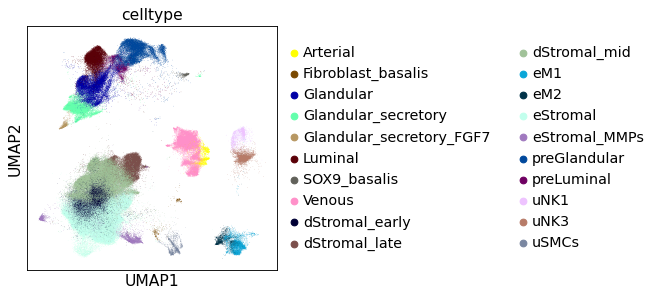

eStromal                    55612
dStromal_mid                43790
dStromal_early              16804
Venous                      15494
Glandular                   13050
dStromal_late               12209
preGlandular                11840
Luminal                     10250
Glandular_secretory          8610
eStromal_MMPs                3993
eM1                          3854
uNK3                         3716
preLuminal                   2735
Arterial                     1697
uNK1                         1644
eM2                          1643
uSMCs                        1386
Glandular_secretory_FGF7      804
Fibroblast_basalis            420
SOX9_basalis                  355
Name: celltype, dtype: int64


In [7]:
adata = adata[[ i in celltypes_of_interest for i in adata.obs['celltype'] ]]
sc.pl.umap(adata, color=['celltype'])
print(adata.obs['celltype'].value_counts())

### Downsample celltypes for memory efficiency

In [8]:
adataDown = adata.copy()

### Downsample to even the contribution
target_cells = 1000

adataDown.obs['cell'] = adataDown.obs.index
adatas = [adataDown[adataDown.obs['celltype'].isin([cl])] for cl in adataDown.obs['celltype'].cat.categories]

for dat in adatas:
    if dat.n_obs > target_cells:
        sc.pp.subsample(dat, n_obs=target_cells, random_state=0)
adata_downsampled = adatas[0].concatenate(*adatas[1:])
adataDown = adataDown[[ i in adata_downsampled.obs.cell.tolist() for i in adataDown.obs['cell'] ]]
del adata_downsampled
del adatas

print(adataDown.obs['celltype'].value_counts())

Arterial                    1000
eM1                         1000
uNK3                        1000
uNK1                        1000
preLuminal                  1000
preGlandular                1000
eStromal_MMPs               1000
eStromal                    1000
eM2                         1000
dStromal_mid                1000
dStromal_late               1000
dStromal_early              1000
Venous                      1000
Luminal                     1000
Glandular_secretory         1000
Glandular                   1000
uSMCs                       1000
Glandular_secretory_FGF7     804
Fibroblast_basalis           420
SOX9_basalis                 355
Name: celltype, dtype: int64


# Save normalised counts gene expression 

Generate the normalized counts

In [9]:
sc.pp.filter_genes(adataDown, min_cells = 5)
sc.pp.filter_cells(adataDown, min_genes = 200)
sc.pp.normalize_per_cell(adataDown, counts_per_cell_after=1e4)
adataDown.X.shape

Trying to set attribute `.var` of view, copying.


(18579, 17663)

In [10]:
adataDown.write('/nfs/team292/lg18/endometriosis/cellphoneDB/input/counts_normalised.h5ad')

In [11]:
def grouped_obs_percent(adata, group_key, layer=None, gene_symbols=None):
    if layer is not None:
        getX = lambda x: x.layers[layer]
    else:
        getX = lambda x: x.X
    if gene_symbols is not None:
        new_idx = adata.var[idx]
    else:
        new_idx = adata.var_names

    grouped = adata.obs.groupby(group_key)
    out = pd.DataFrame(
        np.zeros((adata.shape[1], len(grouped)), dtype=np.float64),
        columns=list(grouped.groups.keys()),
        index=adata.var_names
    )

    for group, idx in grouped.indices.items():
        X = getX(adata[idx])
        X.data = X.data > 0.01
        perc = np.asarray(np.sum(X,axis=0)/X.shape[0]).reshape(-1)
        out[group] = [round(i, 2) for i in perc ]
    return out


def grouped_obs_mean(adata, group_key, layer=None, gene_symbols=None):
    if layer is not None:
        getX = lambda x: x.layers[layer]
    else:
        getX = lambda x: x.X
    if gene_symbols is not None:
        new_idx = adata.var[idx]
    else:
        new_idx = adata.var_names

    grouped = adata.obs.groupby(group_key)
    out = pd.DataFrame(
        np.zeros((adata.shape[1], len(grouped)), dtype=np.float64),
        columns=list(grouped.groups.keys()),
        index=adata.var_names
    )

    for group, idx in grouped.indices.items():
        X = getX(adata[idx])
        out[group] = np.ravel(X.mean(axis=0, dtype=np.float64))
    return out

In [12]:
percent = grouped_obs_percent(adataDown, 'celltype')
pd.DataFrame(percent).to_csv('/nfs/team292/lg18/endometriosis/cellphoneDB/input/counts_percent.csv')

means = grouped_obs_mean(adataDown, 'celltype')
pd.DataFrame(means).to_csv('/nfs/team292/lg18/endometriosis/cellphoneDB/input/counts_mean.csv')

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


# Save meta

In [13]:
df_meta = pd.DataFrame(data={'Cell':list(adataDown.obs.index),
                             'cell_type':[ i for i in adataDown.obs['celltype']] })
df_meta.set_index('Cell', inplace=True)
df_meta.to_csv('/nfs/team292/lg18/endometriosis/cellphoneDB/input/meta.tsv', sep = '\t')

# Save microenvironments

In [14]:
mylist = [(key, x) for key,val in microenvironments.items() for x in val]
df_microenvironments = pd.DataFrame(mylist, columns=['microenvironment', 'celltype'])
df_microenvironments

,microenvironment,celltype
0,Prolif_basalis,SOX9_basalis
1,Prolif_basalis,eStromal
2,Prolif_basalis,eStromal_MMPs
3,Prolif_basalis,Fibroblast_basalis
4,Prolif_basalis,uSMCs
5,Secretory_early,preGlandular
6,Secretory_early,preLuminal
7,Secretory_early,dStromal_early
8,Secretory_early,uNK3
9,Secretory_early,uNK1


In [15]:
# 1st column = cluster; 2nd column = microenvironment 
df_microenvironments = df_microenvironments[[ 'celltype', 'microenvironment']]
df_microenvironments.to_csv('/nfs/team292/lg18/endometriosis/cellphoneDB/input/microenvironments.tsv', index=False, sep='\t')

## Save pre-calculated DEGs

We previously estimated DEGs for each celltype within each lineage (hierarchycal analysis). 
Here we will upload each DEGs analyssi (one per lineage) and assemble a single file with the upregulated genes in the celltypes of interests.

In [16]:
DEGs_epithelial = pd.read_csv('/nfs/team292/lg18/endometriosis/cellphoneDB/input/spare_DEGs/epithelial_DEGs.tsv',index_col=None, sep = '\t')
DEGs_epithelial.head()

DEGs_stromal = pd.read_csv('/nfs/team292/lg18/endometriosis/cellphoneDB/input/spare_DEGs/mesenchymal_DEGs.tsv',index_col=None, sep = '\t')
DEGs_stromal.head()

DEGs_immune = pd.read_csv('/nfs/team292/lg18/endometriosis/cellphoneDB/input/spare_DEGs/immune_DEGs.tsv',index_col=None, sep = '\t')
DEGs_immune.head()

DEGs_endo = pd.read_csv('/nfs/team292/lg18/endometriosis/cellphoneDB/input/spare_DEGs/endothelial_DEGs.tsv',index_col=None, sep = '\t')
DEGs_endo.head()

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
0,1.393120e-163,2.352341,0.796,0.060,1.901608e-159,Arterial,GJA4
1,7.465154e-151,2.155916,1.000,0.998,1.018994e-146,Arterial,SRP14
2,1.449242e-145,2.012652,0.906,0.284,1.978215e-141,Arterial,EFNB2
3,6.732491e-131,1.437232,0.610,0.011,9.189850e-127,Arterial,SEMA3G
4,1.269774e-125,2.221084,0.976,0.471,1.733241e-121,Arterial,AQP1


In [17]:
DEGs = pd.concat([DEGs_epithelial, DEGs_stromal, DEGs_immune, DEGs_endo])
DEGs.head()

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
0,0.0,3.712861,0.962,0.079,0.0,Ciliated,TPPP3
1,0.0,3.694381,0.960,0.051,0.0,Ciliated,C20orf85
2,0.0,3.458541,0.940,0.042,0.0,Ciliated,C9orf24
3,0.0,3.374081,0.954,0.063,0.0,Ciliated,C1orf194
4,0.0,3.315326,0.930,0.043,0.0,Ciliated,C11orf88


In [18]:
# Filter significant DEGs
cond1 = DEGs['p_val_adj'] < 0.01 
cond2 = DEGs['avg_log2FC'] > 0.75
cond3 = [i in celltypes_of_interest for i in DEGs['cluster']]
mask = [all(tup) for tup in zip(cond1, cond2, cond3)]
fDEGs = DEGs[mask]

In [19]:
print(fDEGs['cluster'].value_counts())
DEGs.head()

eM1                         262
eM2                         261
Glandular_secretory_FGF7    224
Arterial                    142
Glandular_secretory         135
Fibroblast_basalis          128
SOX9_basalis                122
Luminal                     110
uNK1                        108
dStromal_late               101
preGlandular                100
eStromal_MMPs                97
Glandular                    84
uNK3                         74
Venous                       46
preLuminal                   43
eStromal                     37
dStromal_early               34
dStromal_mid                 27
Name: cluster, dtype: int64


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
0,0.0,3.712861,0.962,0.079,0.0,Ciliated,TPPP3
1,0.0,3.694381,0.960,0.051,0.0,Ciliated,C20orf85
2,0.0,3.458541,0.940,0.042,0.0,Ciliated,C9orf24
3,0.0,3.374081,0.954,0.063,0.0,Ciliated,C1orf194
4,0.0,3.315326,0.930,0.043,0.0,Ciliated,C11orf88


### Format table to match cellphoneDB format

In [20]:
# 1st column = cluster; 2nd column = gene 
fDEGs = fDEGs[['cluster', 'gene', 'p_val_adj', 'p_val', 'avg_log2FC', 'pct.1', 'pct.2']] 
fDEGs.to_csv('/nfs/team292/lg18/endometriosis/cellphoneDB/input/DEGs_upregulated_genes.tsv', index=False, sep='\t')